# Simulated Annealing

Author: Rosalvo Neto

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sin

## Funções auxiliares

In [2]:
def decaimentoTemperatura(To, k, alpha):
    return To/(1 + alpha*k)
    
def getChancePassosIndireto(delta, t):
    return exp(-delta/t)  

## Função Objetivo

In [3]:
# Min e Max da função
#v_min, v_max = -6.0, 6.0
v_min, v_max = 2.7, 7.5 

In [4]:
def objetivo(x):
    #return x**2.0
    return sin(x) + sin((10/3)*x)

## Gerando amostra

In [5]:
def amostra(x_min, x_max):
    X = np.arange(x_min, x_max, 0.1)
    # Aplicando a função objetivo nas entradas
    Y = [objetivo(x) for x in X]
    return X, Y

In [6]:
X, Y = amostra(v_min, v_max)

## Plotando o gráfico

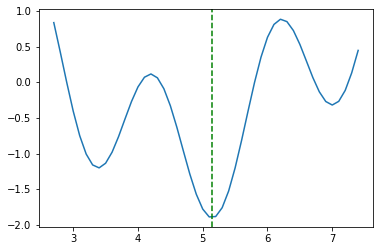

In [7]:
plt.plot(X, Y)
plt.axvline(x=5.1457, ls='--', color='g') # "0" or "5.1457"
plt.show()

## Executando a Busca

In [8]:
def sucessor(x, l_min, l_max):
    
    x_delta = np.random.uniform(-1, 1)
    x_new   = x + x_delta
    
    if x_new > l_max:
        return l_max
    
    if x_new < l_min:
        return l_min
    
    return x_new    

Temperatura
X: 5.148770157617173


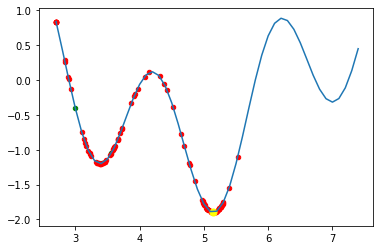

In [9]:
plt.plot(X, Y)

# ---> Simulated Annealing <--- #
temperatura_inicial = 30
alpha     = 0.9
# ---> Simulated Annealing <--- #

# Estado Inicial
x_atual = 3
y_atual = objetivo(x_atual)

# Melhor Estado
x_best = x_atual
y_best = y_atual

plt.scatter(x_atual, y_atual, s=20, color = "green")

# Limite para o Loop
limit_total = 5000
n_total = 0

limit_sem_melhora = 500
n_sem_melhora = 0

while True:    
    
    # ---> Simulated Annealing <--- #
    n_total = n_total + 1
    t = decaimentoTemperatura(temperatura_inicial, n_total, alpha)    
    # ---> Simulated Annealing <--- # 
    
    x_proximo = sucessor(x_atual, v_min, v_max)
    y_proximo = objetivo(x_proximo)
    if y_proximo < y_best:
        x_atual = x_proximo
        y_atual = y_proximo
        x_best = x_atual
        y_best = y_atual
        plt.scatter(x_atual, y_atual, s=20, color = "green")
    else:
        n_sem_melhora = n_sem_melhora + 1
        # ---> Simulated Annealing <--- #
        delta = (y_proximo - y_atual)
        chancePassoIndireto = getChancePassosIndireto(delta, t)
        if np.random.rand()<=chancePassoIndireto:
            x_atual = x_proximo
            y_atual = y_proximo
            plt.scatter(x_atual, y_atual, s=20, color = "red")
        # ---> Simulated Annealing <--- #
        
    if n_total > limit_total:
        print('Paraou pelo total')
        break

    if n_sem_melhora > limit_sem_melhora:
        print('Convergência')
        print('X: ' + str(x_atual))
        break
    
    if t < 0.1:
        print('Temperatura')
        print('X: ' + str(x_best))
        break        

plt.scatter(x_best, y_best, s=50, color = "yellow")

plt.show()